In [1]:
import csv

from dice import ScoreBasedPlayer, Game
from collections import defaultdict
from simulations import turn_based_simulations

In [2]:
num_games = 10000
num_players = range(2,20)
player_scores = range(50,1000,50)

In [3]:
players = defaultdict(float)

In [4]:
for num_player in num_players:
    players[num_player] = turn_based_simulations([player_score for player_score in player_scores],num_games=num_games,num_players=num_player)

In [5]:
with open('scoredbasedloopednumberofplayers.csv',mode='w',newline='') as file:
    wr = csv.writer(file,delimiter=',')
    wr.writerow(['NumberOfPlayers','Score','WinPercentage','AverageOpponentScore'])
    for num_player in num_players:
        for key,value in players[num_player].items():
            wr.writerow([num_player,key,value[0],value[1]])

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r'scoredbasedloopednumberofplayers.csv')
df

,NumberOfPlayers,Score,WinPercentage,AverageOpponentScore
0,2,50,0.1365,251.005000
1,2,100,0.2796,251.235000
2,2,150,0.4552,250.810000
3,2,200,0.5586,250.150000
4,2,250,0.6023,250.700000
...,...,...,...,...
337,19,750,0.0602,250.360000
338,19,800,0.0500,249.835556
339,19,850,0.0442,249.293333
340,19,900,0.0402,250.544167


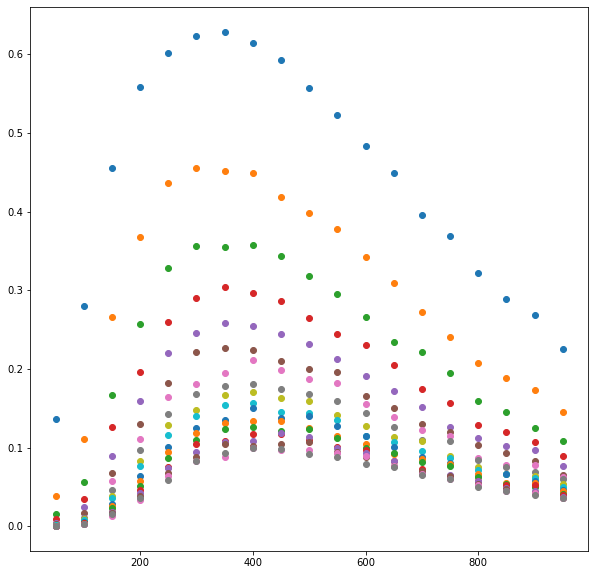

In [10]:
fig,ax = plt.subplots(1,figsize=(10,10))
for player in df.NumberOfPlayers.unique():
    temp_df = df.loc[df.NumberOfPlayers == player]
    
    ax.scatter(temp_df.Score,temp_df.WinPercentage)
    